<a href="https://colab.research.google.com/github/riccardoscut/riccardoscut/blob/main/CrypToData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a simple project to retrieve, clean, manipulate, and analyze cryptocurrency data using Python and pandas can be a fun way to get hands-on experience with data manipulation and analysis. Here's a step-by-step guide on how to approach this project.


1. Set Up Your Environment
Ensure you have the necessary packages installed. You'll need the following:

2. Data Retrieval
You can retrieve cryptocurrency data using public APIs like the CoinGecko API or the CoinMarketCap API. CoinGecko doesn’t require authentication, so it’s a simpler starting point.


In [1]:

pip install pandas requests matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 64 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 167 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 22.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 26.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Importiamo i moduli

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # data visualization
pd.options.mode.chained_assignment = None  # suppress DataFrame slice warning

Read bitcoin price csv


In [18]:
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
...,...,...,...,...,...,...,...,...,...,...
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23


Bitcoin

In [21]:
btc = df.loc[df['crypto_name'] == 'Bitcoin'].copy()
btc = btc.set_index('date')
btc.index = pd.to_datetime(btc.index)
btc

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,,
2013-05-05,0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin
2013-05-06,2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin
2013-05-07,4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin
2013-05-08,7,109.599998,115.779999,109.599998,113.566002,0.000000e+00,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin
2013-05-09,9,113.199997,113.459999,109.260002,112.669998,0.000000e+00,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin
...,...,...,...,...,...,...,...,...,...
2022-09-25,72692,18936.311515,19134.733194,18696.468304,18802.097976,2.335997e+10,3.602593e+11,2022-09-25T23:59:59.999Z,Bitcoin
2022-10-02,72752,19311.848708,19370.309281,18970.620583,19044.107272,2.076596e+10,3.650248e+11,2022-10-02T23:59:59.999Z,Bitcoin
2022-10-09,72815,19417.479411,19542.538654,19349.258953,19446.426194,1.683726e+10,3.728768e+11,2022-10-09T23:59:59.999Z,Bitcoin


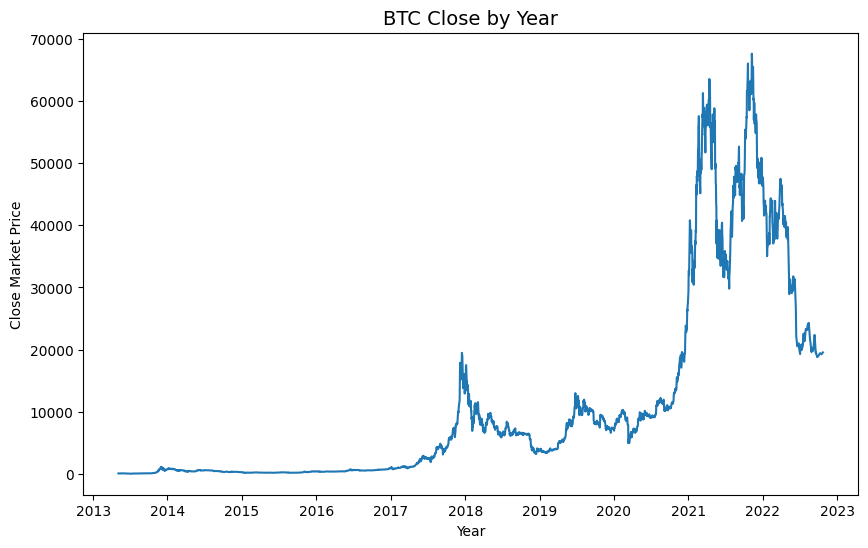

In [22]:
# Plot btc 'close' column
plt.figure(figsize=(10,6))
plt.title('BTC Close by Year', fontsize=14)
plt.ylabel('Close Market Price')
plt.xlabel('Year')
plt.plot(btc['close'])

Analyze Volatility

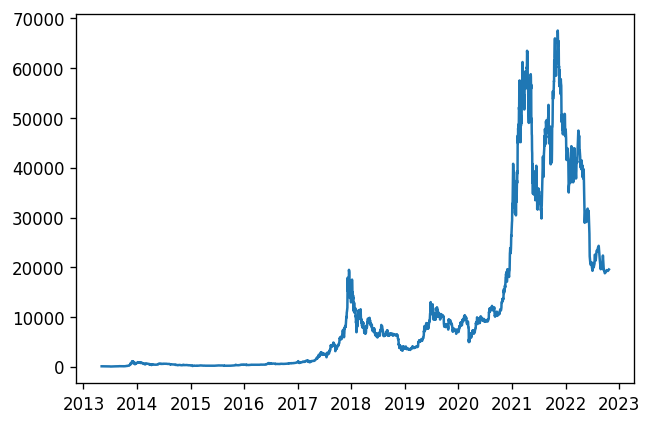

In [23]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plt.plot(btc['close'])

In [24]:
annual_volatility = btc['close'].groupby(btc.index.year).std()
annual_volatility

date
2013     277.250404
2014     148.637744
2015      59.337860
2016     139.255734
2017    4053.192202
2018    2455.455469
2019    2641.803823
2020    4228.934474
2021    9877.460240
2022    9249.822449
Name: close, dtype: float64

Lets' standardize the volatility considering the the period.

In [25]:
close_annual_vol = btc['close'].index.map(lambda d: annual_volatility.loc[d.year])
close_annual_vol

Index([277.25040402278984, 277.25040402278984, 277.25040402278984,
       277.25040402278984, 277.25040402278984, 277.25040402278984,
       277.25040402278984, 277.25040402278984, 277.25040402278984,
       277.25040402278984,
       ...
        9249.822448508365,  9249.822448508365,  9249.822448508365,
        9249.822448508365,  9249.822448508365,  9249.822448508365,
        9249.822448508365,  9249.822448508365,  9249.822448508365,
        9249.822448508365],
      dtype='float64', name='date', length=3248)

In [26]:
btc['close'] = btc['close'] / close_annual_vol

Text(0.5, 1.0, 'BTC Close Votality Standardized')

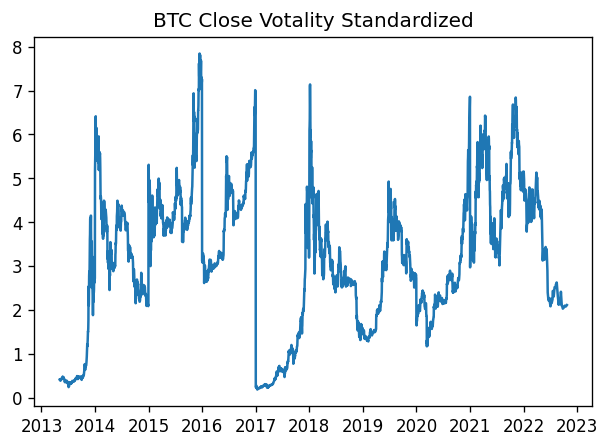

In [28]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plt.plot(btc['close'])
plt.title('BTC Votality Standardized', fontsize=12)

Text(0, 0.5, 'close')

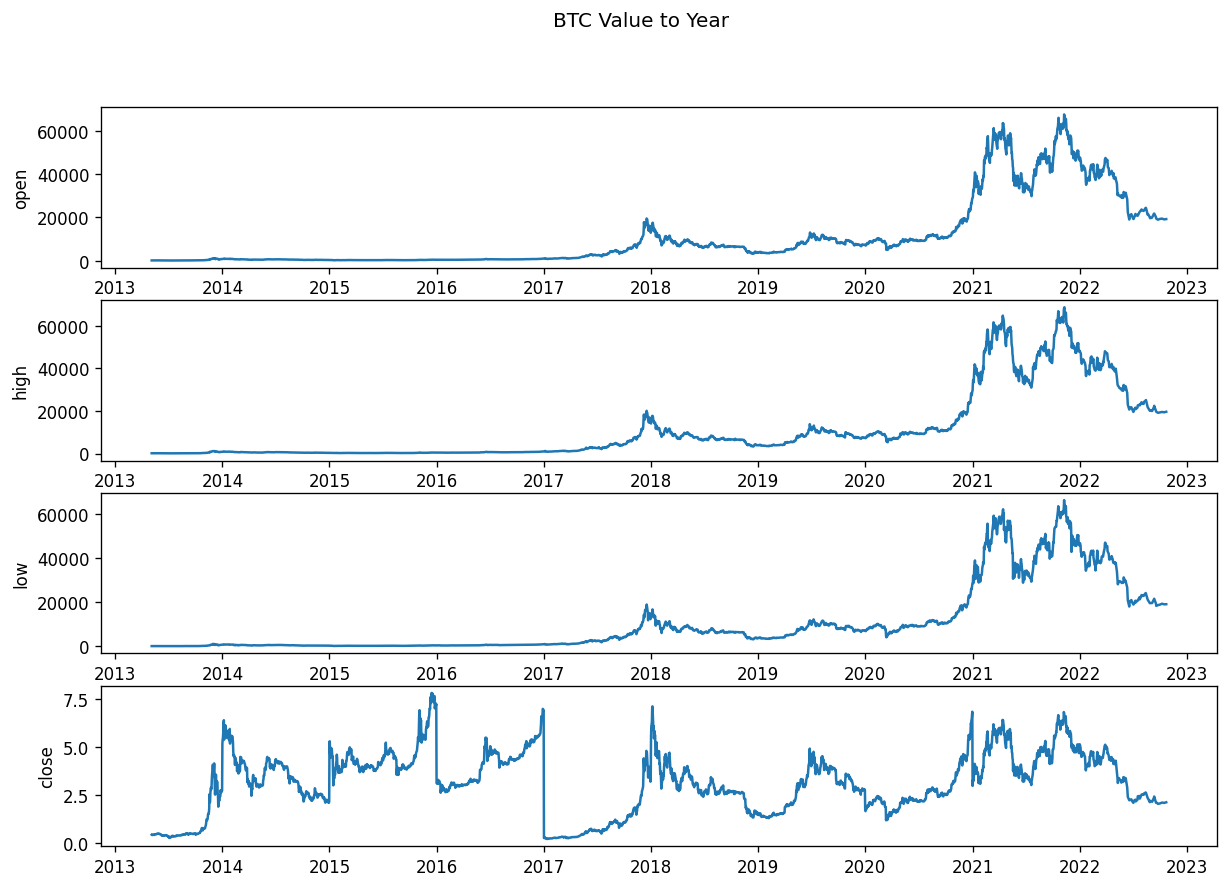

In [29]:
# Plot
plt.rcParams.update({'figure.figsize': (12,8)})
fig, axs = plt.subplots(4)
fig.suptitle('BTC Value to Year')
axs[0].plot(btc['open'])
axs[0].set_ylabel('open')
axs[1].plot(btc['high'])
axs[1].set_ylabel('high')
axs[2].plot(btc['low'])
axs[2].set_ylabel('low')
axs[3].plot(btc['close'])
axs[3].set_ylabel('close')

In [45]:
btc['close'] = btc['close'].pct_change()
print(btc['close'])

date
2013-05-05         NaN
2013-05-06   -0.031145
2013-05-07   -0.007124
2013-05-08    0.018529
2013-05-09   -0.007890
                ...   
2022-09-25   -0.037967
2022-10-02    0.012871
2022-10-09    0.021126
2022-10-16   -0.009170
2022-10-23    0.015513
Name: close, Length: 3248, dtype: float64


Calculate 7 days moving average

In [46]:
btc['3_day_MA'] = btc['close'].rolling(window=3).mean()
print(btc['3_day_MA'])

date
2013-05-05         NaN
2013-05-06         NaN
2013-05-07         NaN
2013-05-08   -0.006580
2013-05-09    0.001172
                ...   
2022-09-25   -0.054487
2022-10-02   -0.006226
2022-10-09   -0.001323
2022-10-16    0.008276
2022-10-23    0.009156
Name: 3_day_MA, Length: 3248, dtype: float64


Find higest price

In [51]:
highest_price = btc['close'].max()
print(highest_price)

1.4584381942908942


6. Basic Analysis and Visualization
You can perform some basic analysis and visualize the data to understand trends. For example, plot the price and moving average over time.

In [ ]:
import matplotlib.pyplot as plt

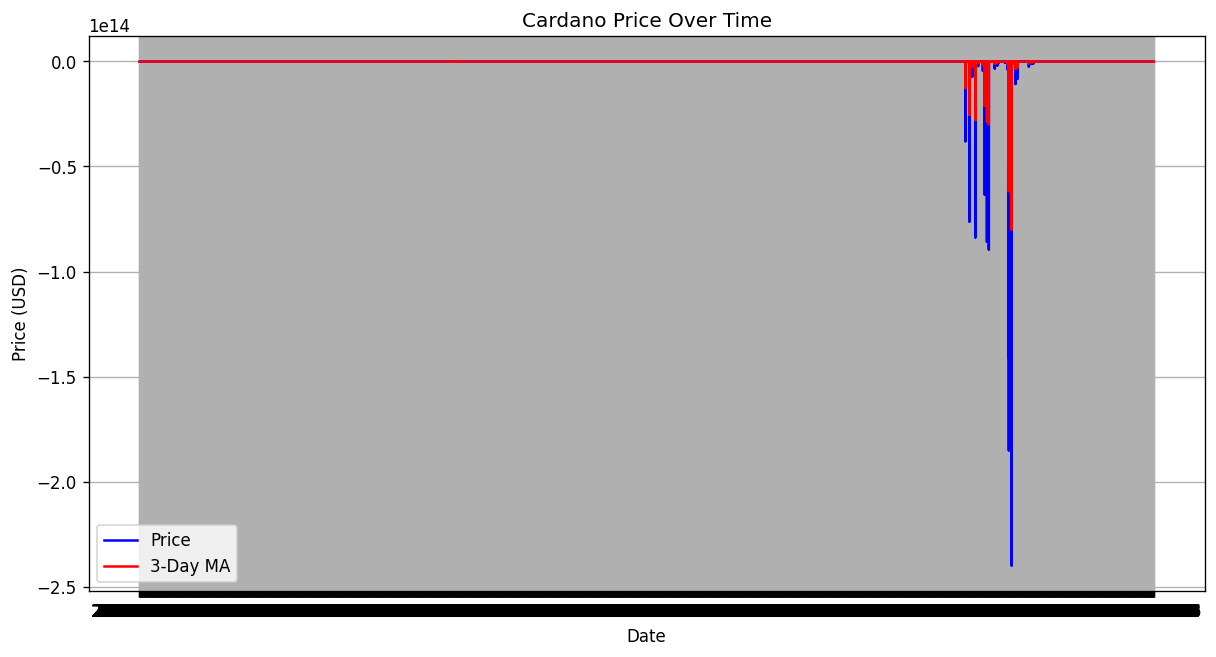

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['date'], bitcoin_data['close'], label='Price', color='blue')
plt.plot(bitcoin_data['date'], bitcoin_data['3_day_MA'], label='3-Day MA', color='red')
plt.title('Cardano Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Saving your data

In [58]:
bitcoin_data.to_csv('cardano_cleaned_data.csv', index=False)

Carica i dati:
Importa il dataset di prezzo di Cardano che hai ottenuto tramite l’API di CoinGecko.
Scarica e carica anche il dataset di notizie dal link che hai fornito. Questo dataset include articoli e notizie legate alle criptovalute, con timestamp che indicano quando è stata pubblicata ogni notizia.

In [60]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 125 kB 4.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Carica il dataset ddelle notizie di Bitcoin


In [62]:
news_data = pd.read_csv('cryptopanic_news.csv')
news_data['date'] = pd.to_datetime(cardano_data['date'])
print(news_data)

            id                                              title  sourceId  \
0          873        ApeCoin Community Votes to Stay on Ethereum         2   
1          875  Terraform Labs Co-Founder Denies Accusations o...         2   
2          876  Anchor dev claims he warned Do Kwon over unsus...         7   
3          877  With 12 Key Measures of Prices, Truflation’s R...        11   
4          878  'Father' of the Metaverse Neal Stephenson laun...         7   
...        ...                                                ...       ...   
164996  174621  ETH-based Memecoin, MOG Hits New ATH, Enters T...       144   
164997  174622  Mog Coin Price Continues to Surge as New Wiene...       144   
164998  174623  Ethereum Memecoin MOG Becomes Biggest 24H Gain...       134   
164999  174624  Year-to-Date Crypto Winners: Meme Coins Outper...        24   
165000  174625  Solana (SOL) Tanks Nearly 6% Despite Meme Coin...       127   

             date                                  

In [68]:

# Identifica cambiamenti significativi di prezzo (es. > 5%)
price_df.columns
price_df['price_change'] = price_df['close'].pct_change()  # Calcola la variazione percentuale
significant_changes = price_df[price_df['price_change'].abs() > 0.05]  # Cambiamenti > 5%

# Unisci i dati delle notizie con i cambiamenti significativi di prezzo
merged_df = pd.merge(significant_changes, news_df, left_on='timestamp', right_on='newsDatetime', how='left')

# Analizza le correlazioni
print(merged_df[['timestamp', 'daily_return', 'price_change', 'title']])
merged_df.columns


NameError: name 'price_df' is not defined

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['timestamp'], merged_df['price'], label='Price', color='blue')
plt.plot(merged_df['timestamp'], merged_df['negative'], label='21-Day MA', color='red')
plt.title('Cardano Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Percorso ai file CSV su locale
base_path = '/'

# Carica i file CSV in DataFrame
cryptopanic_news = pd.read_csv(base_path + 'cryptopanic_news.csv')
currency = pd.read_csv(base_path + 'currency.csv')
news_currency = pd.read_csv(base_path + 'news__currency.csv')
news_currencies_source_joinedResult = pd.read_csv(base_path + 'news_currencies_source_joinedResult.csv')
source = pd.read_csv(base_path + 'source.csv')

# Visualizza le prime righe di ciascun DataFrame per verificare
print("Cryptopanic News:")
print(cryptopanic_news.head())
print("\nCurrency:")
print(currency.head())
print("\nNews Currency:")
print(news_currency.head())
print("\nNews Currencies Source Joined Result:")
print(news_currencies_source_joinedResult.head())
print("\nSource:")
print(source.head())
